### Titanic Data

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
train_df = pd.read_csv("Titanic/train.csv")
test_df = pd.read_csv("Titanic/test.csv")

<Axes: ylabel='Density'>

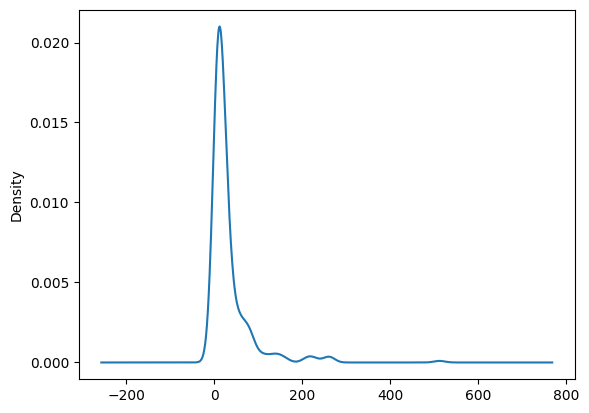

In [70]:
df = pd.concat([train_df.drop(columns=['Survived']), test_df]).sample(1309)

df['Fare'].plot(kind='kde')

In [71]:
samples = []
stds = []

for i in range(10):
    x = df['Fare'].dropna().sample(30).values
    stds.append(x.std())
    samples.append(x.tolist())

samples = np.array(samples)

sampling_means = samples.mean(axis=1)

In [72]:
sampling_std = np.mean(stds)

<Axes: ylabel='Density'>

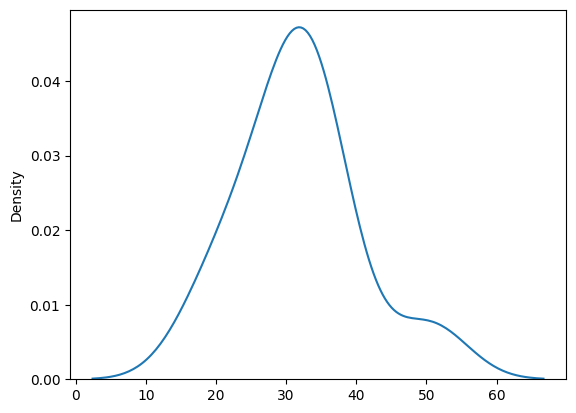

In [73]:
sns.kdeplot(sampling_means)

In [74]:
sampling_means.mean()

31.81894333333333

In [75]:
sampling_means.std() / np.sqrt(30)

1.4846086091524442

In [76]:
lower_limit = sampling_means.mean() - 2.042 * (sampling_std / np.sqrt(30))
upper_limit = sampling_means.mean() + 2.042 * (sampling_std / np.sqrt(30))

print(f"The range is {lower_limit} to {upper_limit}")

The range is 16.73810379167147 to 46.89978287499519


In [77]:
df['Fare'].mean()

33.29547928134557

### Relationship Between Margin of Error and Population Standard Deviation (Z Procedure)

In [78]:
import scipy.stats as stats

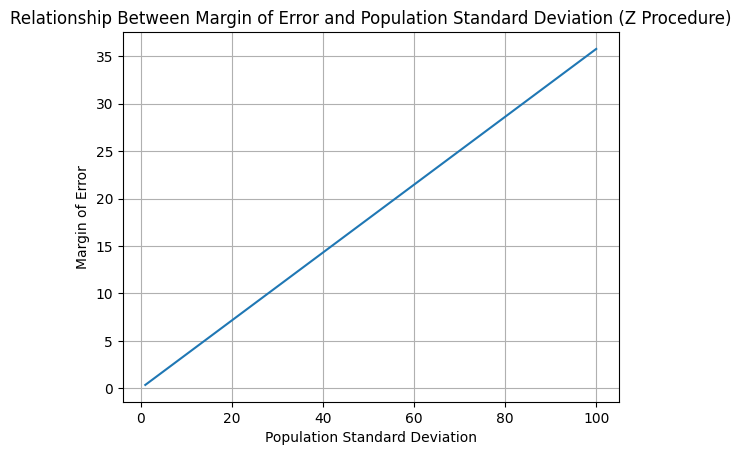

In [79]:
# Set parameters
sample_size = 30
confidence_level = 95

# Calculate the critical value for the Z-score
critical_value = stats.norm.ppf((1 + confidence_level / 100) / 2)

# Generate an array of population standard deviations
population_std_devs = np.arange(1, 101)

# Calculate the margin of error for each population standard deviation
margin_of_error = critical_value * (population_std_devs / np.sqrt(sample_size))

# Plot the relationship
plt.plot(population_std_devs, margin_of_error)
plt.xlabel("Population Standard Deviation")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Population Standard Deviation (Z Procedure)")
plt.grid(True)
plt.show()

### Relationship Between Margin of Error and Sample Sizes (Z Procedure)

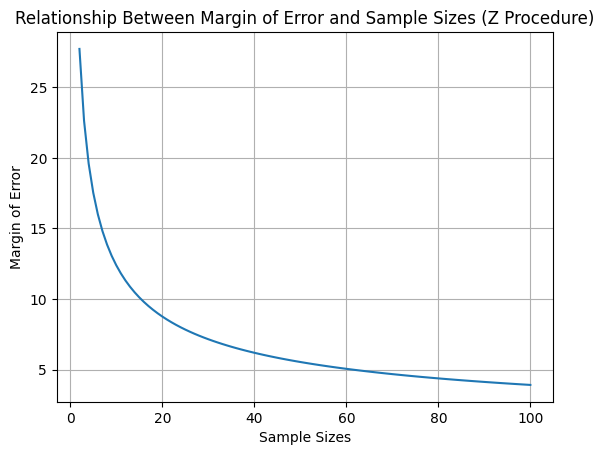

In [80]:
# Set parameters
population_std_dev = 20
confidence_level = 95

# Calculate the critical value for the Z-score
critical_value = stats.norm.ppf((1 + confidence_level / 100) / 2)

# Generate an array of sample sizes
sample_sizes = np.arange(2, 101)

# Calculate the margin of error for each sample size
margin_of_error = critical_value * (population_std_dev / np.sqrt(sample_sizes))

# Plot the relationship
plt.plot(sample_sizes, margin_of_error)
plt.xlabel("Sample Sizes")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Sample Sizes (Z Procedure)")
plt.grid(True)
plt.show()

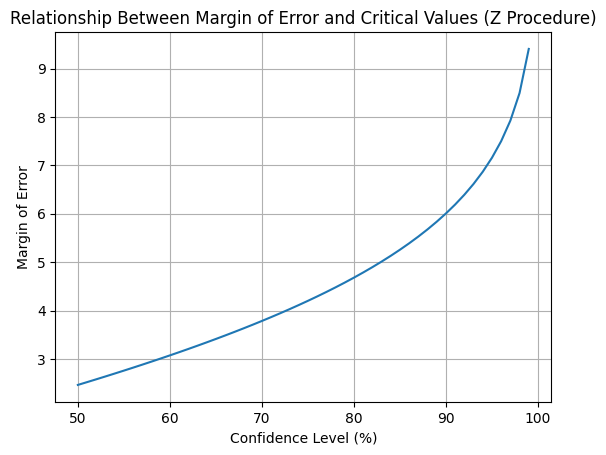

In [81]:
# Set parameters
sample_size = 30
population_std_dev = 20

# Generate an array of confidence levels from 50% to 99%
confidence_levels = np.arange(50, 100)

# Calculate the critical values (Z-scores) for each confidence level
critical_values = stats.norm.ppf((1 + confidence_levels / 100) / 2)

# Calculate the margin of error for each critical value
margin_of_error = critical_values * (population_std_dev / np.sqrt(sample_size))

# Plot the relationship
plt.plot(confidence_levels, margin_of_error)
plt.xlabel("Confidence Level (%)")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Critical Values (Z Procedure)")
plt.grid(True)
plt.show()